In [53]:
# Convert part 1 into dataframe seperatly since it has header information
cr19_part_1_df <- read.table("raw_data_csvs/cr19_part1.csv", sep = ",", header = TRUE, fill=TRUE)

In [54]:
# Store header from 1st csv for later
cr19_header <- colnames(cr19_part_1_df)

In [55]:
# Create vector of file paths for csv parts 2 through 6 which have no header
csv_files_without_headers <- c("raw_data_csvs/cr19_part5.csv", 
                               "raw_data_csvs/cr19_part3.csv", 
                               "raw_data_csvs/cr19_part4.csv",
                               "raw_data_csvs/cr19_part5.csv", 
                               "raw_data_csvs/cr19_part6.csv")

In [56]:
# Combine csvs 2 through 6
# Source: https://stackoverflow.com/a/40349019/6328256
cr19_part_2_to_6_df <- do.call(rbind, 
                               lapply(csv_files_without_headers, 
                                      read.csv, header = FALSE, 
                                      stringsAsFactors = FALSE)
                              )

In [57]:
# Added header to cr19_part_2_to_6_df
# Source: https://stackoverflow.com/a/14022113/6328256
colnames(cr19_part_2_to_6_df) <- cr19_header

In [58]:
# Create overall merged dataframe to be used for analysis
cr19_df <- rbind(cr19_part_1_df, cr19_part_2_to_6_df)
head(cr19_df)

FISCALYR,CIRCUIT,DISTRICT,OFFICE,DOCKET,DEFNO,CTDEF,NAME,REOPSEQ,TYPEREG,⋯,CTTRTRN,CTTR,CTTRWOR,CTTRR,CTPN,CTPNWOF,SOURCE,VER,LOADDATE,TAPEYEAR
<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>
2019,0,90,1,6,2,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
2019,0,90,1,27,2,-8,NA,0,CR,⋯,0,0,0,0,1,1,MASTER,0,2012-03-21,2099
2019,0,90,1,55,2,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
2019,0,90,1,58,1,1,NA,0,CR,⋯,0,0,0,0,1,1,MASTER,0,2012-03-21,2099
2019,0,90,1,69,1,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
2019,0,90,1,79,1,-8,NA,0,CR,⋯,0,0,0,0,1,1,MASTER,0,2012-03-21,2099


In [59]:
head(cr19_df)

FISCALYR,CIRCUIT,DISTRICT,OFFICE,DOCKET,DEFNO,CTDEF,NAME,REOPSEQ,TYPEREG,⋯,CTTRTRN,CTTR,CTTRWOR,CTTRR,CTPN,CTPNWOF,SOURCE,VER,LOADDATE,TAPEYEAR
<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>
2019,0,90,1,6,2,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
2019,0,90,1,27,2,-8,NA,0,CR,⋯,0,0,0,0,1,1,MASTER,0,2012-03-21,2099
2019,0,90,1,55,2,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
2019,0,90,1,58,1,1,NA,0,CR,⋯,0,0,0,0,1,1,MASTER,0,2012-03-21,2099
2019,0,90,1,69,1,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
2019,0,90,1,79,1,-8,NA,0,CR,⋯,0,0,0,0,1,1,MASTER,0,2012-03-21,2099


In [60]:
##Nature of Offense is coded in Column labeled "FOFFCD1," the numbers are 6500 - 6505

##below get a glimpse of the column
df2 <- cr19_df[, "FOFFCD1", drop=FALSE]
head(df2)

FOFFCD1
<int>
6501
7830
6701
7830
7100
6701


In [61]:
##Count total violations by District (90, 16)

#90: DC
#16: Maryland

sum(cr19_df$DISTRICT == '90')
sum(cr19_df$DISTRICT == '16')

##there are more total violations in Maryland than DC, probably due to size

[1] 2202

[1] 2738

In [62]:
##Data Exploration of Marijuana Possession, Sell/Distribute/Dispense, Import/Export, Manufacture, Fraudulent Rx, and NARC Marijuana Act

##Below we will conduct analysis on Marijuana Possession

##Count total marijuana possession cases in all districts
sum(cr19_df$FOFFCD1 == '6504')

##First create a dataframe of just marijuana possession cases

Marijuana_Pos <- subset(cr19_df, FOFFCD1 == '6504')
head(Marijuana_Pos)

##then count by district

sum(Marijuana_Pos$DISTRICT == '90')
sum(Marijuana_Pos$DISTRICT == '16')


[1] 2256

,FISCALYR,CIRCUIT,DISTRICT,OFFICE,DOCKET,DEFNO,CTDEF,NAME,REOPSEQ,TYPEREG,⋯,CTTRTRN,CTTR,CTTRWOR,CTTRR,CTPN,CTPNWOF,SOURCE,VER,LOADDATE,TAPEYEAR
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>
1832,2019,0,90,1,9100227,1,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
2129,2019,0,90,1,9700293,2,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
10676,2019,2,6,1,1000583,1,1,NA,0,CR,⋯,1,1,1,0,0,0,CMECF,1,2019-08-07,2019
10752,2019,2,6,1,503,1,-8,NA,0,CR,⋯,0,0,0,0,1,1,MASTER,0,2012-03-21,2099
11689,2019,2,6,7,1800093,1,1,NA,0,CR,⋯,1,1,1,0,0,0,CMECF,2,2018-12-06,2019
11690,2019,2,6,7,1800129,1,1,NA,0,CR,⋯,1,1,1,0,0,0,CMECF,1,2018-12-06,2019


[1] 2

[1] 10

In [63]:
#Calculate Proportion of Marijuana Possession cases by district

#90: DC

1/2202

#16: Maryland
10/2738

[1] 0.0004541326

[1] 0.003652301

In [64]:
##Now we will run a hypothesis test to see if statistical significance of proportions- Marijuana Possession

prop.test(x = c(1, 10), n = c(2202, 2738), p = NULL, alternative = "two.sided",
          correct = TRUE)



Warning message in prop.test(x = c(1, 10), n = c(2202, 2738), p = NULL, alternative = "two.sided", :
“Chi-squared approximation may be incorrect”


	2-sample test for equality of proportions with continuity correction

data:  c(1, 10) out of c(2202, 2738)
X-squared = 4.2713, df = 1, p-value = 0.03876
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.0060363084 -0.0003600283
sample estimates:
      prop 1       prop 2 
0.0004541326 0.0036523009 


District,Proportion_of_Poss_Charges
<fct>,<fct>
Maryland,0.0454%
D.C.,0.3652%


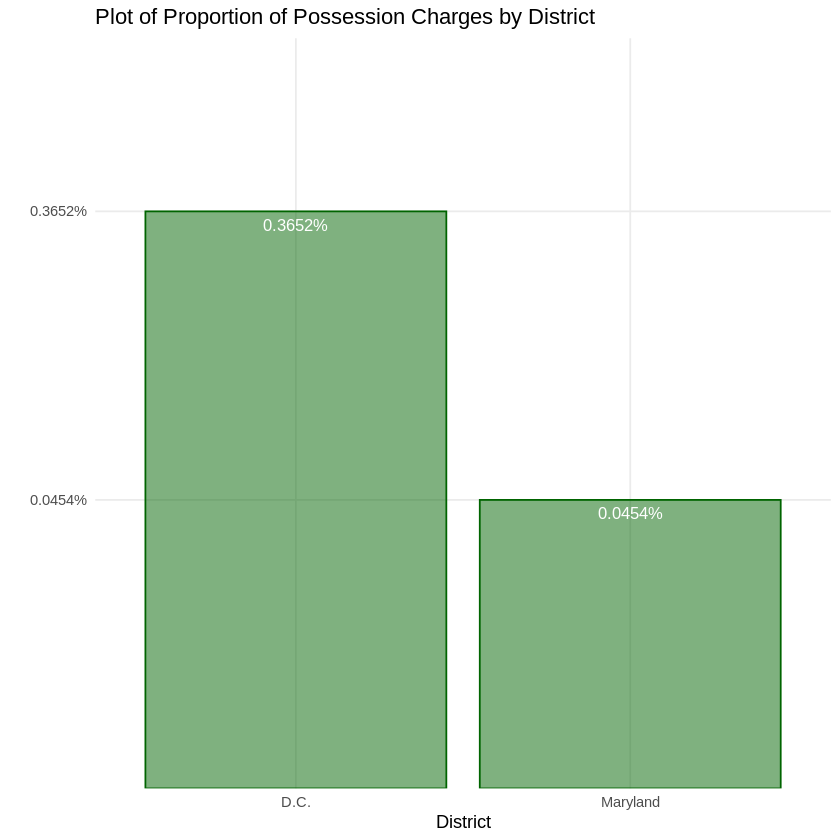

In [168]:
#Visualizing Proportions of Marijuana Possession Charges

#First create a dataframe of the proportions.

District <- c('Maryland', 'D.C.')
Proportion_of_Poss_Charges <- c('0.0454%', '0.3652%')

Poss_dataframe <- data.frame(District, Proportion_of_Poss_Charges)
Poss_dataframe

#Then make histogram with dataframe
t <- ggplot(Poss_dataframe, aes(x= District, y=Proportion_of_Poss_Charges)) +
ggtitle("Use theme(plot.title = element_text(hjust = 0.5)) to center") +
  theme(plot.title = element_text(hjust = 0.5))+
geom_bar(stat="identity", fill = "dark green", colour = "dark green", alpha=0.5) +
geom_text(aes(label=Proportion_of_Poss_Charges), vjust=1.6, color="white", size=3.5)+
  theme_minimal()

t + labs(title="Plot of Proportion of Possession Charges by District", 
         x="District", y = "") 

In [65]:
##Now we will do analysis on Marijuana Selling, Distrbuting, Dispensing (MSDD)
#Count total MSDD Cases all Districts

sum(cr19_df$FOFFCD1 == '6501')

[1] 5106

In [66]:
#Create a dataframe of Marijuana SDD Cases

Marijuana_SDD <- subset(cr19_df, FOFFCD1 == '6501')
head(Marijuana_SDD)

,FISCALYR,CIRCUIT,DISTRICT,OFFICE,DOCKET,DEFNO,CTDEF,NAME,REOPSEQ,TYPEREG,⋯,CTTRTRN,CTTR,CTTRWOR,CTTRR,CTPN,CTPNWOF,SOURCE,VER,LOADDATE,TAPEYEAR
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>
1,2019,0,90,1,6,2,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
447,2019,0,90,1,1100254,1,1,NA,0,CR,⋯,0,0,0,0,1,1,CMECF,1,2014-12-10,2099
448,2019,0,90,1,1100254,3,3,NA,0,CR,⋯,0,0,0,0,1,1,CMECF,1,2014-12-10,2099
655,2019,0,90,1,1400241,2,2,NA,0,CR,⋯,0,0,0,0,1,1,CMECF,0,2015-01-11,2099
1001,2019,0,90,1,1700216,1,1,NA,0,CR,⋯,0,0,0,0,1,1,CMECF,1,2019-07-17,2099
1002,2019,0,90,1,1700216,2,2,NA,0,CR,⋯,1,1,1,0,0,0,CMECF,1,2019-05-12,2019


In [67]:
##Count Marijuana SDD Cases by District

sum(Marijuana_SDD$DISTRICT == '90')
sum(Marijuana_SDD$DISTRICT == '16')

[1] 14

[1] 47

In [68]:
#Calculate Proportion of Marijuana SDD cases by district

#90: DC

14/2202

#16: Maryland
47/2738

[1] 0.006357856

[1] 0.01716581

In [69]:
##Now we will run a hypothesis test to see if statistical significance of difference - Marijuana SDD


prop.test(x = c(14, 47), n = c(2202, 2738), p = NULL, alternative = "two.sided",
          correct = TRUE)


	2-sample test for equality of proportions with continuity correction

data:  c(14, 47) out of c(2202, 2738)
X-squared = 10.82, df = 1, p-value = 0.001004
alternative hypothesis: two.sided
95 percent confidence interval:
 -0.017107585 -0.004508331
sample estimates:
     prop 1      prop 2 
0.006357856 0.017165814 


District,Proportion_of_SDD_Charges
<fct>,<fct>
Maryland,0.6358%
D.C.,1.7166%


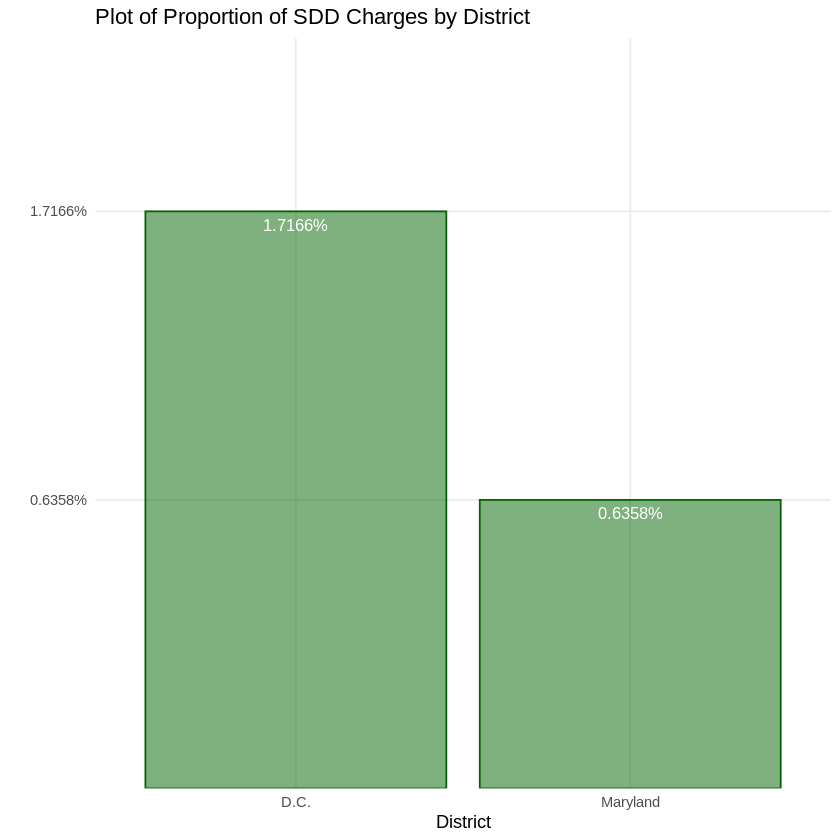

In [173]:
#Visualizing Proportions of Marijuana SDD Charges

#First create a dataframe of the proportions.

District <- c('Maryland', 'D.C.')
Proportion_of_SDD_Charges <- c('0.6358%', '1.7166%')

SDD_dataframe <- data.frame(District, Proportion_of_SDD_Charges)
SDD_dataframe

#Then make histogram with dataframe
p <- ggplot(SDD_dataframe, aes(x= District, y=Proportion_of_SDD_Charges)) +
ggtitle("Use theme(plot.title = element_text(hjust = 0.5)) to center") +
  theme(plot.title = element_text(hjust = 0.5))+
geom_bar(stat="identity", fill = "dark green", colour = "dark green", alpha=0.5) +
geom_text(aes(label=Proportion_of_SDD_Charges), vjust=1.6, color="white", size=3.5)+
  theme_minimal()

p + labs(title="Plot of Proportion of SDD Charges by District", 
         x="District", y = "") 

In [70]:
#Now we will do an analysis of Narc. Marijuana Tax Act (NMTA)
#Count total NMTA Cases all Districts

sum(cr19_df$FOFFCD1 == '6500')

[1] 133

In [71]:
#Create a dataframe of NMTA Cases

Marijuana_NMTA <- subset(cr19_df, FOFFCD1 == '6500')
head(Marijuana_NMTA)

,FISCALYR,CIRCUIT,DISTRICT,OFFICE,DOCKET,DEFNO,CTDEF,NAME,REOPSEQ,TYPEREG,⋯,CTTRTRN,CTTR,CTTRWOR,CTTRR,CTPN,CTPNWOF,SOURCE,VER,LOADDATE,TAPEYEAR
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>
16976,2019,2,7,9,7100112,2,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
21899,2019,2,8,1,7000352,1,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
41393,2019,9,73,2,36664,4,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
45607,2019,9,73,2,6701191,1,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
45608,2019,9,73,2,6701222,1,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
45613,2019,9,73,2,6802338,2,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099


In [72]:
##Count NMTA Cases by District

sum(Marijuana_NMTA$DISTRICT == '90')
sum(Marijuana_NMTA$DISTRICT == '16')

[1] 0

[1] 0

In [73]:
#Proportions are 0 as well, no need for hypothesis test

In [74]:
##Now we will analyse Marijuana Importation/Exportation (MIE)

In [75]:
#Count total MIE Cases all Districts

sum(cr19_df$FOFFCD1 == '6502')

[1] 1333

In [76]:
#Create a dataframe of MIE Cases

Marijuana_MIE <- subset(cr19_df, FOFFCD1 == '6502')
head(Marijuana_MIE)

,FISCALYR,CIRCUIT,DISTRICT,OFFICE,DOCKET,DEFNO,CTDEF,NAME,REOPSEQ,TYPEREG,⋯,CTTRTRN,CTTR,CTTRWOR,CTTRR,CTPN,CTPNWOF,SOURCE,VER,LOADDATE,TAPEYEAR
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>
2518,2019,1,0,2,1300142,1,1,NA,0,CR,⋯,0,0,0,0,1,0,CMECF,2,2017-04-06,2099
2519,2019,1,0,2,1300142,2,2,NA,0,CR,⋯,0,0,0,0,1,0,CMECF,1,2014-06-09,2099
4082,2019,1,1,1,7200387,1,-8,NA,0,CR,⋯,0,0,0,0,1,0,MASTER,0,2012-03-21,2099
4117,2019,1,1,1,8900246,5,5,NA,0,CR,⋯,0,0,0,0,1,0,CMECF,1,2018-10-10,2099
6833,2019,1,4,3,1700389,1,1,NA,0,CR,⋯,1,1,1,0,0,0,CMECF,1,2019-08-08,2019
6834,2019,1,4,3,1700389,2,2,NA,0,CR,⋯,1,1,1,0,0,0,CMECF,2,2019-10-09,2019


In [77]:
##Count MIE Cases by District

sum(Marijuana_MIE$DISTRICT == '90')
sum(Marijuana_MIE$DISTRICT == '16')

[1] 0

[1] 0

In [78]:
#We dont need a hypothesis test here

In [79]:
#Now we will do analysis of Marijuana Manufacturing (MM)

In [80]:
#Count total MM Cases all Districts

#Count total MM Cases all Districts

sum(cr19_df$FOFFCD1 == '6503')

[1] 391

In [81]:
#Create a dataframe of MM Cases

Marijuana_MM <- subset(cr19_df, FOFFCD1 == '6503')
head(Marijuana_MM)

,FISCALYR,CIRCUIT,DISTRICT,OFFICE,DOCKET,DEFNO,CTDEF,NAME,REOPSEQ,TYPEREG,⋯,CTTRTRN,CTTR,CTTRWOR,CTTRR,CTPN,CTPNWOF,SOURCE,VER,LOADDATE,TAPEYEAR
,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<fct>,<int>
2312,2019,1,0,1,1200163,4,4,NA,0,CR,⋯,0,0,0,0,1,1,CMECF,1,2013-05-06,2099
2332,2019,1,0,1,1700125,1,1,NA,0,CR,⋯,1,1,1,0,0,0,CMECF,1,2019-03-05,2019
2333,2019,1,0,1,1700125,2,2,NA,0,CR,⋯,1,1,1,0,0,0,CMECF,2,2019-06-05,2019
2401,2019,1,0,2,1800063,13,13,NA,0,CR,⋯,0,0,0,0,1,1,CMECF,0,2018-11-07,2099
2402,2019,1,0,2,1800063,14,14,NA,0,CR,⋯,0,0,0,0,1,1,CMECF,0,2018-11-07,2099
2404,2019,1,0,2,1800063,16,16,NA,0,CR,⋯,0,0,0,0,1,1,CMECF,1,2019-01-03,2099


In [82]:
##Count MM Cases by District

sum(Marijuana_MM$DISTRICT == '90')
sum(Marijuana_MM$DISTRICT == '16')

[1] 0

[1] 0

In [83]:
#Proportions are 0, no need for hypothesis test

In [84]:
#Now we analyze Marijuana Records, Rxs, Fraudulent Rx (MRRF) cases

In [85]:
##Count total MRRF Cases all Districts

sum(cr19_df$FOFFCD1 == '6505')

[1] 0

In [86]:
#No need for further analysis of MRRF cases (because there are none)

In [87]:
##We decided to base our paper off of the analysis conducted only on the Possession cases and the SDD cases, as those are the 
##analyses that we had enough cases to extrapolate from

Charge,Estimate,CI_lower,CI_upper
<fct>,<fct>,<fct>,<fct>
SDD,-0.010807958,-0.017107585,-0.004508331
Possession,-0.00319816835,-0.0060363084,-0.0003600283


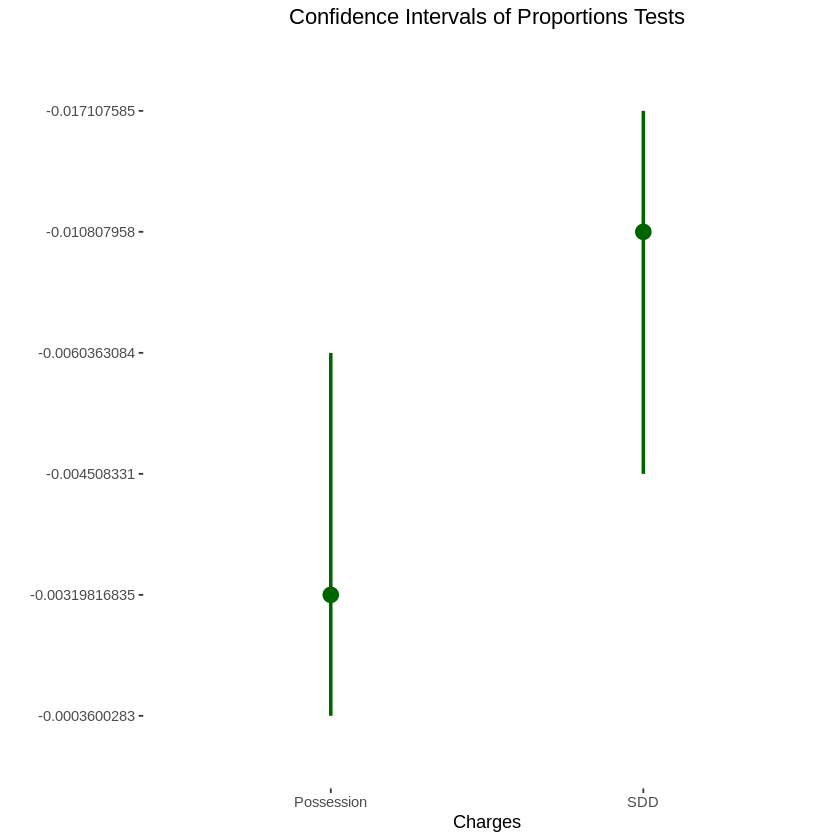

In [211]:
##Data Visualization of Confidence Intervals

##Make a dataframe to use for the plot

Charge <- c("SDD", "Possession")
Estimate <- c('-0.010807958', '-0.00319816835')
CI_lower <- c('-0.017107585', '-0.0060363084')
CI_upper <- c('-0.004508331', '-0.0003600283')

CI_data <- data.frame(Charge, Estimate, CI_lower, CI_upper)
CI_data



##SDD Estimate: -0.01080796
##Poss Estimate: -0.00319817

#Now Plot

CI <- ggplot(CI_data, aes(x=Charge, y=Estimate)) + 
  geom_errorbar(aes(ymin=CI_lower, ymax=CI_upper), 
                lwd=1, width=0, position = position_dodge(width = 0.5), colour = "dark green") + 
  labs(x ="")+
 geom_point(size=4, pch=21,position = position_dodge(width = 0.5), colour = "dark green", fill = "dark green") +
  theme(panel.background = element_rect(fill = "white"))

CI + labs(title="Confidence Intervals of Proportions Tests", 
         x="Charges", y = "") 

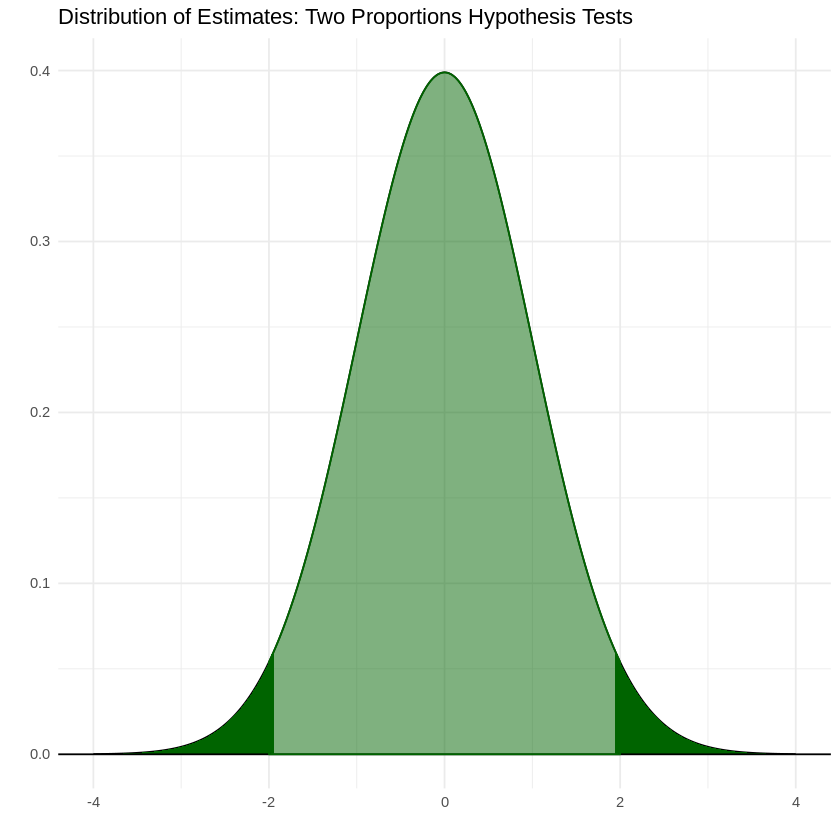

In [247]:
##Visualizing Normal Dist for Hypothesis Tests

library(data.table)
library(ggplot2)

NormalDist <- data.frame(
    x = seq(-4,4, by = 0.01),
    y = dnorm(seq(-4,4, by = 0.01))
)

criticalValues <- qnorm(c(.025,.975))

shadeNormalTwoTailedLeft <- rbind(c(criticalValues[1],0), subset(normalDistribution, x < criticalValues[1]))

shadeNormalTwoTailedRight <- rbind(c(criticalValues[2],0), subset(normalDistribution, x > criticalValues[2]), c(3,0))

N <- ggplot(NormalDist, aes(x,y)) +
    geom_line() +
    geom_polygon(data = shadeNormalTwoTailedLeft, aes(x=x, y=y), fill="dark green") +
    geom_polygon(data = shadeNormalTwoTailedRight, aes(x=x, y=y), fill="dark green") +
    guides(fill="green") +
    geom_hline(yintercept = 0) +
stat_function(fun = dnorm, 
                xlim = c(-2,2),
                geom = "area", fill = "dark green", 
               colour = "dark green", 
               alpha = 0.5) +
    geom_segment(aes(x = criticalValues[1], y = 0, xend = criticalValues[1], yend = dnorm(criticalValues[1])), colour = "dark green") +
    geom_segment(aes(x = criticalValues[2], y = 0, xend = criticalValues[2], yend = dnorm(criticalValues[2])), colour = "dark green") +
  theme_minimal()

N + labs(title="Distribution of Estimates: Two Proportions Hypothesis Tests", 
         x="", y = "") 